# Prediction Observation Classification Pipeline

- **Goal:** Prediction Classification

In [1]:
import os
import sys

import importlib.util

import pandas as pd


from pathlib import Path
from IPython.display import Image

# Get the current working directory of the notebook
notebook_dir = os.getcwd()
# Add the parent directory to the system path
sys.path.append(os.path.join(notebook_dir, '../'))

import log_files
from data_processing import DataProcessing
from feature_extraction import TfidfFeatureExtraction, SpacyFeatureExtraction
# from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

# Absolute path to your local classification_models.py file
project_root = "/Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions"
module_path = os.path.join(project_root, "classification_models.py")

# Dynamically load the module so it overrides any installed package
spec = importlib.util.spec_from_file_location("classification_models", module_path)
classification_models = importlib.util.module_from_spec(spec)
spec.loader.exec_module(classification_models)

# Inject into sys.modules so pickle uses this
sys.modules["classification_models"] = classification_models

# ✅ Now you can use the classes
perception_model = classification_models.SkLearnPerceptronModel()
sgd_model = classification_models.SkLearnSGDClassifier()
EvaluationMetric = classification_models.EvaluationMetric
from classification_models import SkLearnPerceptronModel, SkLearnSGDClassifier, EvaluationMetric

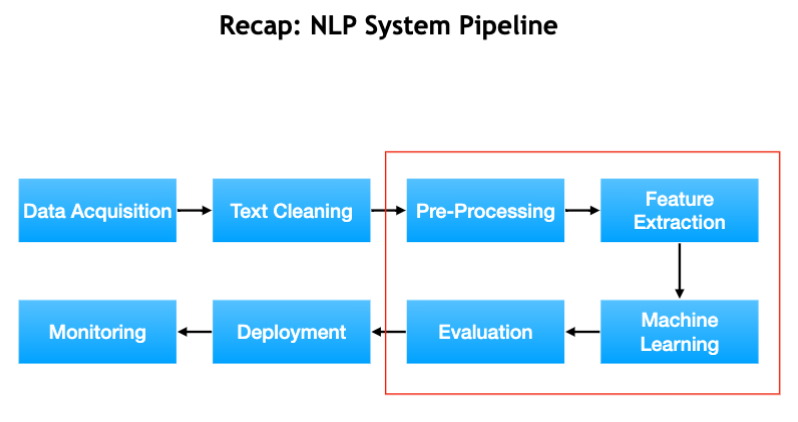

In [2]:
Image(filename='../misc_experiments/base_pipeline.png')

## 1-Data Acquisition

In [3]:
pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
log_file_path = "data/prediction_logs"
predictions = True
predictions_df = log_files.read_data(notebook_dir, log_file_path, predictions)
len(predictions_df), predictions_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_1-prediction/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-prediction
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_2-prediction/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/prediction_logs/batch_3-pre

(358,
                                                                                                                    Base Sentence  \
 0                                     JPMorgan Chase forecasts that the net profit at Amazon potentially decrease in Q3 of 2027.   
 1                                  On August 21, 2024, Bank of America speculates the revenue at Microsoft will likely increase.   
 2                                                   Citigroup predicts on 2024-08-21, the operating income at Alphabet may rise.   
 3                              According to Goldman Sachs, the research and development expenses at Facebook would fall in 2025.   
 4  In 21 August 2024, Morgan Stanley envisions that the gross profit at Johnson & Johnson has some probability to remain stable.   
 5                                              The stock price at Visa should stay same in Q2 of 2026, according to Wells Fargo.   
 6                                           JPMorgan forecasts

In [5]:
log_file_path = "data/observation_logs"
predictions = False
observations_df = log_files.read_data(notebook_dir, log_file_path, predictions)
len(observations_df), observations_df.head(7)

Start logging batch
log_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observation
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_1-observation/batch_1-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observation
CSV to DF
Load saved csv: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/batch_2-observation/batch_2-from_df.csv
save_batch_directory: /Users/detraviousjamaribrinkley/Documents/Development/research_labs/uf_ds/predictions/pipelines/../data/observation_logs/b

(1363,
                                                                                                                                Base Sentence  \
 0             The financial analyst at Goldman Sachs observed that the operating income at Tesla had increased in the first quarter of 2024.   
 1                                         On 2024-08-20 to 2025-08-20, Morgan Stanley speculates the stock price at Amazon will likely rise.   
 2                                                                       A young investor predicts on 2025-03-15, the S&P 500 index may rise.   
 3                                        According to Bank of America, the net profit at Microsoft would fall in the second quarter of 2026.   
 4  In 2027-01-01 to 2027-12-31, Wells Fargo envisions that the interest rates at the Federal Reserve have some probability to remain stable.   
 5             The trading volume at Apple should stay same in the fourth quarter of 2025, according to a financial expert 

## 2-Data Processing

In [6]:
pred_obs_dfs = [predictions_df, observations_df]
base_df = DataProcessing.concat_dfs(pred_obs_dfs)
shuffled_base_df = DataProcessing.shuffle_df(base_df)
len(shuffled_base_df), shuffled_base_df.head(7)

(1721,
                                                                                                                                               Base Sentence  \
 0                               On 10/12/2025 to 10/12/2026, a research advisor at Harvard University speculates the net profit at Amazon will likely rise.   
 1                               In 2026, the Centers for Disease Control and Prevention envisioned that the diabetes prevalence in the Northeast decreased.   
 2                                                                          The research advisor noted on 09/15/2020, the stock prices of BioTech Corp fell.   
 3                                       Policy researcher, David, observed that the voter turnout at local elections had remained stable in September 2025.   
 4                                                       In Q4 of 2026, economist Dr. David Kim reported that food assistance claims in urban counties fell.   
 5  In Q3 of 2027, a college stud

## 3-Feature Extraction

### TF x IDF

In [7]:
max_features = None

tf_idf_feature_extractor = TfidfFeatureExtraction(shuffled_base_df, 'Base Sentence')
tfidf_vectorized_features = tf_idf_feature_extractor.word_feature_extraction(max_features)
tfidf_vectorized_features_df = tf_idf_feature_extractor.feature_scores(max_features)
tfidf_vectorized_features_df.head(3)

,Base Sentence,Sentence Label,01,02,03,04,05,06,07,08,09,10,11,11th,12,14,14th,15,15th,16,17,18,19,1st,20,2012,2016,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2045,2046,2048,2049,2050,2054,21,22,23,24,25,25th,26,27,28,2nd,30,31,3rd,49ers,50,500,5g,76ers,abc,academic,academy,according,accuracy,accuweather,across,activity,adaptation,adherence,adler,administered,administration,administrative,adolescents,adoption,adults,advanced,advisers,advisor,aerobic,affordable,africa,african,afternoon,aged,agencies,agency,ahmed,ai,aid,air,airport,airports,alex,algorithm,alibaba,alicia,all,allergies,allocation,alphabet,amara,amazon,amelia,america,american,americans,among,an,analysis,analyst,analysts,and,anderson,angeles,ann,annual,anticipates,antonio,anxiety,app,apple,applications,approaching,approval,approvals,approved,april,arbor,arch,arctic,are,areas,arizona,armour,arrangements,artificial,as,asia,asian,assembly,assist,assistance,assistant,association,assurance,asthma,at,athletic,atlanta,atlantic,atmospheric,attempts,attendance,attending,aug,august,austin,australian,automotive,autumn,ava,average,averages,aviation,awareness,baker,balance,baltimore,bank,banker,banking,banks,bar,barcelona,barclays,barometric,based,bases,basketball,battery,battleground,bay,bayern,beach,been,beijing,benjamin,bennett,berkeley,berkshire,best,biden,biotech,bipartisan,birth,bitcoin,blackhawks,blackrock,bleacher,block,blocked,blood,bloomberg,blue,bmi,bob,body,boeing,books,bookstore,borrowed,boston,brad,bradley,brand,breaches,brian,bridge,broncos,brookings,brooks,brown,bucks,budget,buffett,building,buildright,bulls,bureau,business,businesses,buy,by,cafeteria,cafeterias,café,cake,california,caloric,calorie,calvin,campaign,campaigns,campus,campuses,canada,cancer,canyon,capacity,capitalist,capitol,carbon,cardiovascular,care,career,carl,cars,cases,cash,catalyst,cato,cavaliers,cbs,cdc,celtics,census,center,centers,central,ceo,cessation,cfo,chains,chairman,chance,chances,change,changed,changi,changing,channel,charles,chase,chef,chen,chevron,chicago,chief,chiefs,children,chill,chocolate,cholesterol,chris,chronic,citations,citibank,cities,citigroup,city,civic,claims,claire,clark,clean,cleveland,climate,climatologist,climb,climbed,clinic,clinics,clothing,cloud,club,cnn,coach,coalition,coast,coastal,coca,code,cola,college,colleges,colorado,coming,commentator,commerce,commercial,commission,commissioner,communities,community,companies,company,complaints,completion,compliance,composite,computer,conducted,confidence,congressional,consistent,construction,consulting,consumer,consumption,continued,control,conversion,corner,corp,corporate,corporation,corporations,could,council,councils,count,counties,countries,county,course,coursera,courses,coverage,covid,cowboys,creation,crime,crimes,cto,cubs,cuisine,culinary,current,customer,customers,cybersecurity,daily,dallas,daniel,data,datadive,dave,david,davis,de,deaths,decade,december,decline,declined,decrease,decreased,decreases,defaults,defense,deficit,demand,dengue,densely,density,denver,department,depression,desert,despite,detected,detravious,detroit,deutsche,developed,developing,development,devices,devils,dew,diabetes,diagnosis,diego,dietetics,diets,difference,differential,digestive,dip,director,disease,diseases,dishes,distribution,district,districts,dividend,documented,dodgers,doe,dolphins,dominating,donors,downward,dr,driven,drop,dropped,drug,due,duke,duration,during,eagles,early,earnings,eastern,eco,ecoclean,economic,economics,economist,economy,education,educational,effective,efficiency,efforts,elderly,election,elections,electric,electronics,elementary,elena,elon,emerging,emily,emission,emissions,empire,employee,employment,end,energy,engagement,engineering,engineers,england,enrolled,enrollment,enrollments,enterprise,environmental,envisioned,envisions,equities,eric,error,errors,especially,espn,estate,etfs,ethan,eu,europe,european,eurozone,ev,exam,exchange,executive,expansio

### POS and NER

In [10]:
# !python -m spacy download en_core_web_lg

In [14]:
pos_ner_feature_extractor = SpacyFeatureExtraction(shuffled_base_df, "Base Sentence")
sentences = DataProcessing.df_to_list(shuffled_base_df, 'Base Sentence')
word_leveL_disable_components = ["lemmatizer"]
all_pos_tags, word_to_pos_mapping, all_ner_entities, word_to_ner_mappings =  pos_ner_feature_extractor.extract_features(disable_components=word_leveL_disable_components)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Spacy Doc (0):  On 10/12/2025 to 10/12/2026, a research advisor at Harvard University speculates the net profit at Amazon will likely rise.
 POS: On---ADP------prep---True
 POS: 10/12/2025---NUM------pobj---False
 POS: to---ADP------prep---True
 POS: 10/12/2026---NUM------pobj---False
 POS: ,---PUNCT------punct---False
 POS: a---DET------det---True
 POS: research---NOUN------compound---False
 POS: advisor---NOUN------appos---False
 POS: at---ADP------prep---True
 POS: Harvard---PROPN------compound---False
 POS: University---PROPN------pobj---False
 POS: speculates---VERB------ROOT---False
 POS: the---DET------det---True
 POS: net---ADJ------amod---False
 POS: profit---NOUN------nsubj---False
 POS: at---ADP------prep---True
 POS: Amazon---PROPN------pobj---False
 POS: will---AUX------aux---True
 POS: likely---ADV------advmod---False
 POS: rise---VERB------ccomp---False
 POS: .---PUNCT------punct---False

 

In [15]:
pos_df = DataProcessing.convert_to_df(all_pos_tags, mapping=word_to_pos_mapping)
ner_df = DataProcessing.convert_to_df(all_ner_entities, word_to_ner_mappings)
pos_ner_features = [pos_df, ner_df]
pos_ner_features_df = DataProcessing.concat_dfs(pos_ner_features, axis=1, ignore_index=False)
pos_ner_features_df.head(7)

,ADP_7,DET_1,SCONJ_1,PROPN_9,ADP_2,SCONJ_2,DET_5,NUM_6,ADP_4,VERB_1,ADJ_4,ADV_1,PART_2,PUNCT_5,PROPN_7,NOUN_11,VERB_4,NOUN_7,ADV_2,NOUN_6,PROPN_2,DET_2,ADP_1,PROPN_5,ADP_3,VERB_2,NUM_5,PROPN_10,ADJ_1,NOUN_1,NOUN_4,CCONJ_2,SYM_3,PUNCT_1,SYM_2,ADP_9,PROPN_4,NOUN_8,NUM_3,SYM_4,PUNCT_4,SYM_1,PROPN_3,VERB_3,PROPN_1,DET_4,NOUN_2,ADP_8,PUNCT_2,NOUN_5,PROPN_6,NOUN_9,NOUN_10,PUNCT_6,ADJ_2,DET_6,AUX_2,ADP_5,NOUN_3,AUX_1,NUM_4,ADJ_5,PUNCT_3,DET_3,NUM_1,NUM_2,PROPN_8,CCONJ_1,PRON_2,PRON_1,ADP_6,AUX_3,ADJ_3,PART_1,CARDINAL_1,ORG_2,PRODUCT_1,DATE_3,GPE_1,TIME_1,PERSON_1,DATE_2,PERSON_2,FAC_1,ORG_3,GPE_2,ORG_1,QUANTITY_1,NORP_1,CARDINAL_2,PERCENT_1,DATE_1,ORDINAL_1,MONEY_1,EVENT_1,LAW_1,LOC_1,ORG_4
0,NaN,a,NaN,NaN,to,NaN,NaN,NaN,at,speculates,NaN,likely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University,the,On,NaN,at,rise,NaN,NaN,net,research,NaN,NaN,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,NaN,Harvard,NaN,advisor,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,profit,will,NaN,NaN,NaN,NaN,10/12/2025,10/12/2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harvard University,NaN,NaN,NaN,NaN,10/12/2025 to 10/12/2026,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,the,that,NaN,for,NaN,NaN,NaN,NaN,envisioned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Disease,the,In,Northeast,in,decreased,NaN,NaN,NaN,diabetes,NaN,NaN,NaN,",",NaN,NaN,Prevention,NaN,NaN,NaN,NaN,NaN,Control,NaN,Centers,NaN,prevalence,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the,2026,NaN,NaN,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,the Centers for Disease Control and Prevention,NaN,NaN,NaN,NaN,2026,NaN,NaN,NaN,NaN,Northeast,NaN
2,NaN,The,NaN,NaN,of,NaN,NaN,NaN,NaN,noted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Corp,the,on,NaN,NaN,fell,NaN,NaN,NaN,research,prices,NaN,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BioTech,NaN,advisor,NaN,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stock,NaN,NaN,NaN,NaN,NaN,09/15/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BioTech Corp,NaN,NaN,NaN,NaN,09/15/2020,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,the,that,NaN,in,NaN,NaN,NaN,NaN,observed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,September,NaN,at,NaN,NaN,remained,NaN,NaN,local,Policy,turnout,NaN,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David,NaN,researcher,NaN,",",elections,NaN,NaN,NaN,NaN,stable,NaN,NaN,NaN,voter,had,NaN,NaN,.,NaN,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,September 2025,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,that,NaN,of,NaN,NaN,NaN,NaN,reported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dr.,NaN,In,NaN,in,fell,NaN,NaN,urban,economist,claims,NaN,NaN,",",NaN,NaN,Kim,NaN,NaN,NaN,NaN,NaN,David,NaN,Q4,NaN,food,NaN,.,counties,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,assistance,NaN,NaN,NaN,NaN,NaN,2026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q4,NaN,David Kim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,a,that,NaN,of,NaN,NaN,NaN,NaN,studying,NaN,NaN,NaN,NaN,NaN,NaN,remain,probability,NaN,expenses,Google,the,In,NaN,at,envisions,NaN,NaN,stable,college,research,NaN,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,have,Q3,NaN,student,NaN,.,development,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,finance,NaN,NaN,NaN,NaN,some,2027,NaN,NaN,and,NaN,NaN,NaN,NaN,NaN,to,NaN,NaN,NaN,NaN,Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google,NaN,NaN,NaN,NaN,2027,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,The,NaN,NaN,in,NaN,NaN,NaN,to,stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2,the,at,White,of,according,NaN,NaN,same,customer,analyst,NaN,NaN,",",NaN,NaN,Kevin,NaN,NaN,NaN,NaN,NaN,Mr.,NaN,Starbucks,NaN,satisfaction,NaN,",",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rating,should,NaN,NaN,.,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q2,NaN,NaN,NaN,NaN,Kevin White,NaN,NaN,NaN,NaN,NaN,Starbucks,NaN,NaN,NaN,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
encoded_pos_ner_df = DataProcessing.encode_tags_entities_df(pos_ner_features_df, sentence_and_label_df=shuffled_base_df)
encoded_pos_ner_df.head(3)

,Base Sentence,Sentence Label,ADP_7,DET_1,SCONJ_1,PROPN_9,ADP_2,SCONJ_2,DET_5,NUM_6,ADP_4,VERB_1,ADJ_4,ADV_1,PART_2,PUNCT_5,PROPN_7,NOUN_11,VERB_4,NOUN_7,ADV_2,NOUN_6,PROPN_2,DET_2,ADP_1,PROPN_5,ADP_3,VERB_2,NUM_5,PROPN_10,ADJ_1,NOUN_1,NOUN_4,CCONJ_2,SYM_3,PUNCT_1,SYM_2,ADP_9,PROPN_4,NOUN_8,NUM_3,SYM_4,PUNCT_4,SYM_1,PROPN_3,VERB_3,PROPN_1,DET_4,NOUN_2,ADP_8,PUNCT_2,NOUN_5,PROPN_6,NOUN_9,NOUN_10,PUNCT_6,ADJ_2,DET_6,AUX_2,ADP_5,NOUN_3,AUX_1,NUM_4,ADJ_5,PUNCT_3,DET_3,NUM_1,NUM_2,PROPN_8,CCONJ_1,PRON_2,PRON_1,ADP_6,AUX_3,ADJ_3,PART_1,CARDINAL_1,ORG_2,PRODUCT_1,DATE_3,GPE_1,TIME_1,PERSON_1,DATE_2,PERSON_2,FAC_1,ORG_3,GPE_2,ORG_1,QUANTITY_1,NORP_1,CARDINAL_2,PERCENT_1,DATE_1,ORDINAL_1,MONEY_1,EVENT_1,LAW_1,LOC_1,ORG_4
0,"On 10/12/2025 to 10/12/2026, a research advisor at Harvard University speculates the net profit at Amazon will likely rise.",0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,"In 2026, the Centers for Disease Control and Prevention envisioned that the diabetes prevalence in the Northeast decreased.",0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,"The research advisor noted on 09/15/2020, the stock prices of BioTech Corp fell.",0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [17]:
comparison_result = (tfidf_vectorized_features_df.iloc[:, :2] == encoded_pos_ner_df.iloc[:, :2]).all().all()
comparison_result

np.True_

In [18]:
# If we don't (.iloc[:, 2:]), the sentence and label cols will be duplicated. Confirm that the first two columns are the same in both dataframes, so we can use the columns from the tfidf_vectorized_features_df dataframe.

updated_encoded_pos_ner_df = encoded_pos_ner_df.iloc[:, 2:]
sentence_label_features_df = DataProcessing.concat_dfs([tfidf_vectorized_features_df, updated_encoded_pos_ner_df], axis=1)
sentence_label_features_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

## Models

1. Perceptron

---

- Split: 80% train and 20% test

In [19]:
# sentence_label_features_df[2]

In [20]:
X_train, X_test, y_train, y_test = DataProcessing.split_data(sentence_label_features_df, sentence_label_features_df[2])
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [21]:
def split_sentence_label_features(df: pd.DataFrame) -> tuple:
    sentences = df[0]
    prediction_labels = df[1]
    features_df = df.iloc[:, 2:]
    return sentences, prediction_labels, features_df

X_train_sentences, y_train_prediction_labels, X_train_features_df = split_sentence_label_features(X_train)

In [22]:
# y_train_prediction_labels

In [23]:
X_test_sentences, y_test_prediction_labels, X_test_features_df = split_sentence_label_features(X_test)
X_test_sentences[:3]

744                       On 01/01/2024, the miscellaneous reporter noted that the popularity of electric vehicles in the US increased.
881    The number of women in leadership positions in Fortune 500 companies would fall in Q3 of 2027, according to a study by Catalyst.
602                                                  According to Chase Bank, the returns at emerging market equities fell in May 2035.
Name: 0, dtype: object

In [24]:
y_test_prediction_labels[:3]

744    0
881    0
602    0
Name: 1, dtype: int64

In [25]:
perception_model = SkLearnPerceptronModel()
perception_model.train_model(X_train_features_df, y_train_prediction_labels)
perceptron_predictions = perception_model.predict(X_test_features_df)
perceptron_predictions.to_numpy().ravel()
perceptron_predictions[:3]

0    0
1    1
2    0
dtype: int64

In [26]:
sgd_model = SkLearnSGDClassifier()
sgd_model.train_model(X_train_features_df, y_train_prediction_labels)
sgd_predictions = sgd_model.predict(X_test_features_df)
sgd_predictions.to_numpy().ravel()
sgd_predictions[:3]

0    0
1    1
2    0
dtype: int64

In [27]:
model_predictions_df = pd.concat([X_test_sentences, y_test_prediction_labels], axis=1)
model_predictions_df.columns = ['Sentence', 'Actual Label']

model_predictions_df.head(3)

,Sentence,Actual Label
744,"On 01/01/2024, the miscellaneous reporter noted that the popularity of electric vehicles in the US increased.",0
881,"The number of women in leadership positions in Fortune 500 companies would fall in Q3 of 2027, according to a study by Catalyst.",0
602,"According to Chase Bank, the returns at emerging market equities fell in May 2035.",0


In [28]:
model_predictions_df['Perceptron Predicted Label'] = perceptron_predictions.to_numpy().ravel()
model_predictions_df['SGD Predicted Label'] = sgd_predictions.to_numpy().ravel()
model_predictions_df.head(3)

,Sentence,Actual Label,Perceptron Predicted Label,SGD Predicted Label
744,"On 01/01/2024, the miscellaneous reporter noted that the popularity of electric vehicles in the US increased.",0,0,0
881,"The number of women in leadership positions in Fortune 500 companies would fall in Q3 of 2027, according to a study by Catalyst.",0,1,1
602,"According to Chase Bank, the returns at emerging market equities fell in May 2035.",0,0,0


## Evaluation

In [29]:
get_metrics = EvaluationMetric()

In [30]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, perceptron_predictions)
metrics

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       278
           1       0.71      0.75      0.73        67

    accuracy                           0.89       345
   macro avg       0.83      0.84      0.83       345
weighted avg       0.89      0.89      0.89       345



In [31]:
metrics = get_metrics.eval_classification_report(y_test_prediction_labels, sgd_predictions)
metrics

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       278
           1       0.72      0.63      0.67        67

    accuracy                           0.88       345
   macro avg       0.82      0.78      0.80       345
weighted avg       0.88      0.88      0.88       345



In [32]:
# import pickle
# base_dir = os.path.join(notebook_dir, '../models')
# sgd_path = os.path.join(base_dir, 'sgd_model.pkl')
# with open(sgd_path, 'wb') as file:
#     pickle.dump(sgd_model, file)

In [33]:
# sgd_path